In [1]:
import os
import requests
import re
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
from collections import Counter
plt.style.use('ggplot')
import datetime
import wordcloud
from wordcloud import WordCloud
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from sklearn.decomposition import NMF
# NLTK 
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk import bigrams 
# textblob
from textblob import TextBlob # pip install -U textblob
# LDA with Gensim
import gensim
from gensim import corpora
import pickle
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
# Plotting tools
# Don't forget: pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

# Functions
from our_functions import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xjs356\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\xjs356\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\ProgramData\Anaconda3\lib\site-packages\past\types\oldstr.py:33: DeprecationWarning: invalid escape sequence \d
  """


In [22]:
data = read_tweets('tweets_1.csv')

In [23]:
# Overview on all tweets (to see what needs to be cleaned):
terms_single = set(data['tweets'])

In [24]:
# TO-DO What is about the \n??
# How to reasonable delete non-word characters?
data['tweets_prepr'] =  data['tweets']

# Create a new coloumn for preprocessed tweets
def extract_from_to_column(data, regex, from_col, to_col):
    data[to_col]=data[from_col].apply(lambda x: " ".join(regex.findall(x)))
    return data

def remove_from_body(data,regex):
    data['tweets_prepr']=data.tweets_prepr.apply(lambda x: re.sub(regex,'',x))
    return data

regex1 = re.compile("@(\S+)")   # tagged users
regex2 = re.compile("http\S+")  # urls
regex3 = re.compile("ENGLISH TRANS[^:]*:") # prefix
regex4 = re.compile("#(\S+)") # hashtags
regex5 = re.compile("RT\s") # retweets
regex6 = re.compile("&amp\S+") # remove &amp - code for and
regex7 = re.compile("[^\x00-\x7F]+") # remove Arabic characters

data = extract_from_to_column(data, regex1, 'tweets', 'tags')
data = remove_from_body(data, regex1)

data = extract_from_to_column(data, regex2, 'tweets', 'links')
data = remove_from_body(data, regex2)

data = remove_from_body(data, regex3)

data = extract_from_to_column(data, regex4, 'tweets', 'hashtag')
data = remove_from_body(data, regex4)

data = extract_from_to_column(data, regex5, 'tweets', 'retweets')
data = remove_from_body(data, regex5)

data = remove_from_body(data, regex6)
data = remove_from_body(data, regex7)

# Remove top 25 words as identified in the cleaning notebook
regexw1 = re.compile("killed")
regexw2 = re.compile("army")
regexw3 = re.compile("isi")
regexw4 = re.compile("state")
regexw5 = re.compile("attack")
regexw6 = re.compile("islamic")
regexw9 = re.compile("soldier")
regexw7 = re.compile("allah")
regexw10= re.compile("today")
regexw8 = re.compile("near")
regexw12= re.compile("force")
regexw13= re.compile("muslim")
regexw14= re.compile("city")
regexw15= re.compile("one")
regexw20= re.compile("fighter")
regexw16= re.compile("assad")
regexw17= re.compile("people")
regexw21= re.compile("syrian")
regexw18= re.compile("report")
regexw22= re.compile("rebel")
regexw19= re.compile("abu")
regexw11= re.compile("say")
regexw24= re.compile("group")
regexw25= re.compile("new")
regexw23= re.compile("video")

data = remove_from_body(data, regexw1)
data = remove_from_body(data, regexw2)
data = remove_from_body(data, regexw3)
data = remove_from_body(data, regexw4)
data = remove_from_body(data, regexw5)
data = remove_from_body(data, regexw6)
data = remove_from_body(data, regexw7)
data = remove_from_body(data, regexw8)
data = remove_from_body(data, regexw9)
data = remove_from_body(data, regexw10)
data = remove_from_body(data, regexw11)
data = remove_from_body(data, regexw12)
data = remove_from_body(data, regexw13)
data = remove_from_body(data, regexw14)
data = remove_from_body(data, regexw15)
data = remove_from_body(data, regexw16)
data = remove_from_body(data, regexw17)
data = remove_from_body(data, regexw18)
data = remove_from_body(data, regexw19)
data = remove_from_body(data, regexw20)
data = remove_from_body(data, regexw21)
data = remove_from_body(data, regexw22)
data = remove_from_body(data, regexw23)
data = remove_from_body(data, regexw24)
data = remove_from_body(data, regexw25)

data.tags = data.tags.str.split()

In [25]:
# Do further cleaning as in the cleaning file
terms_single = set(data['tweets_prepr'])
data['tweets_prepr'] = data['tweets_prepr'].str.replace('[^\w\s]','')
data['tweets_prepr'][:5].apply(lambda x: str(TextBlob(x).correct()))
data['tweets_prepr'] = data['tweets_prepr'].apply(lambda x: ' '.join([word.lower() for word in x.split()]))
stop = stopwords.words('english')
data['tweets_prepr_stop'] = data['tweets_prepr'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data['tweets_prepr_stop'] = data['tweets_prepr_stop'].apply(lambda x: ' '.join([word for word in x.split() if len(word) >= 3]))
lmtzr = WordNetLemmatizer()
data['tweets_prepr_stop'] = data['tweets_prepr_stop'].apply(lambda x: ' '.join([lmtzr.lemmatize(word) for word in x.split()]))
terms_single = set(data['tweets_prepr_stop'])


In [26]:
# get most common words (preprocessed and stop-word removal tweet column)
all_words = []
for line in list(data['tweets_prepr_stop']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(25)

[('isi', 812),
 ('islamic', 665),
 ('allah', 597),
 ('state', 555),
 ('assad', 431),
 ('muslim', 406),
 ('syrian', 385),
 ('abu', 362),
 ('regime', 337),
 ('like', 319),
 ('area', 319),
 ('day', 316),
 ('civilian', 312),
 ('syria', 311),
 ('claim', 311),
 ('iraqi', 305),
 ('west', 304),
 ('dont', 295),
 ('north', 293),
 ('militant', 286),
 ('time', 284),
 ('airstrikes', 279),
 ('village', 271),
 ('fight', 271),
 ('know', 258)]

Doesn't seem to work entirely. SOme words got removed, some others (isi, islamic, allah, for instance) not.

In [39]:
# Put word count into a function
def word_count(df):
    all_words = []
    for line in list(df['tweets_prepr_stop']):
        words = line.split()
        for word in words:
            all_words.append(word.lower())
    
    stop_words = set(stopwords.words('english'))
    tweets_stop = [w for w in all_words if not w in stop_words]
    
    return tweets_stop

In [40]:
#### Most frequent words at or around tweet-frequency tweets

In [41]:
##### 2015

In [44]:
df = data.query('date == "2015-9-5" | date == "2015-9-4" | date == "2015-9-6"')
tweets_stop4 = word_count(df)
Counter(tweets_stop4).most_common(25)

df = data.query('date == "2015-9-23" | date == "2015-9-24" | date == "2015-9-25"')
tweets_stop3 = word_count(df)
Counter(tweets_stop3).most_common(25)

df = data.query('date == "2015-12-11" | date == "2015-12-12" | date == "2015-12-13"')
tweets_stop2 = word_count(df)
Counter(tweets_stop2).most_common(25)

df = data.query('date == "2015-12-25" | date == "2015-12-26" | date == "2015-12-27"')
tweets_stop = word_count(df)
Counter(tweets_stop).most_common(25)

[('allah', 4),
 ('abu', 4),
 ('baghdadi', 4),
 ('military', 3),
 ('christian', 3),
 ('islam', 3),
 ('west', 3),
 ('iraqi', 3),
 ('aqap', 3),
 ('best', 3),
 ('bakr', 3),
 ('baghdad', 3),
 ('akbar', 2),
 ('breaking', 2),
 ('ing', 2),
 ('casualty', 2),
 ('jew', 2),
 ('shia', 2),
 ('district', 2),
 ('two', 2),
 ('via', 2),
 ('lost', 2),
 ('doubt', 2),
 ('leader', 2),
 ('fat', 2)]

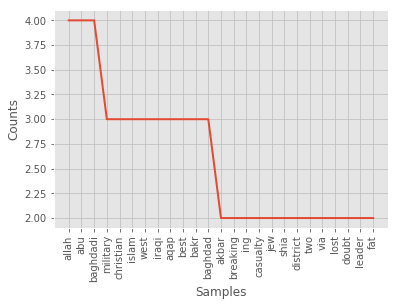

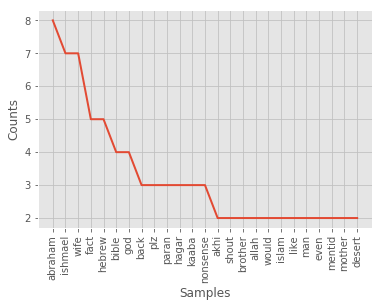

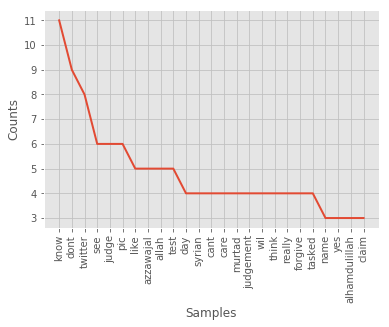

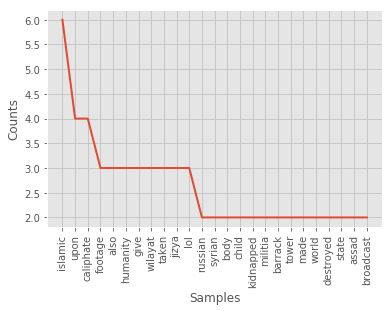

In [45]:
#freq_plot = plt.subplots(2,2, figsize=(16, 10))

#ax[0,0].figure(figsize=(12,5))
#ax[0,0].title('Top 25 most common words AFTER stop-word removal')
#ax[0,0].xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(tweets_stop)
fd.plot(25,cumulative=False)

fd = nltk.FreqDist(tweets_stop2)
fd.plot(25,cumulative=False)

fd = nltk.FreqDist(tweets_stop3)
fd.plot(25,cumulative=False)

fd = nltk.FreqDist(tweets_stop4)
fd.plot(25,cumulative=False)

##### January - February 2016

In [52]:
df = data.query('date == "2016-1-15" | date == "2016-1-16" | date == "2016-1-17"')
tweets_stop = word_count(df)
#Counter(tweets_stop).most_common(25)
#fd = nltk.FreqDist(tweets_stop)
#fd.plot(25,cumulative=False)


[('control', 7),
 ('news', 7),
 ('huge', 7),
 ('never', 6),
 ('khilafah', 6),
 ('16th', 6),
 ('january', 6),
 ('2016', 6),
 ('muslim', 5),
 ('forget', 5),
 ('brigade', 5),
 ('allah', 5),
 ('offensive', 5),
 ('area', 5),
 ('mp3', 5),
 ('docx', 5),
 ('civilian', 5),
 ('thug', 5),
 ('know', 4),
 ('keep', 4),
 ('massacred', 4),
 ('back', 4),
 ('mujahideen', 4),
 ('west', 4),
 ('language', 4)]

In [53]:
df = data.query('date == "2016-1-31"')
tweets_stop = word_count(df)
Counter(tweets_stop).most_common(25)
#fd = nltk.FreqDist(tweets_stop)
#fd.plot(25,cumulative=False)

[('islamic', 24),
 ('assad', 19),
 ('shia', 18),
 ('allah', 17),
 ('two', 17),
 ('damascus', 14),
 ('syrian', 14),
 ('area', 14),
 ('cest', 14),
 ('shrine', 13),
 ('time', 12),
 ('dont', 12),
 ('claim', 12),
 ('state', 12),
 ('iraqi', 12),
 ('regime', 11),
 ('like', 11),
 ('militia', 11),
 ('south', 11),
 ('pa', 11),
 ('targeting', 11),
 ('le', 11),
 ('pour', 11),
 ('east', 11),
 ('syria', 10)]

In [54]:
df = data.query('date == "2016-2-4" | date == "2016-2-5" | date == "2016-2-6"')
tweets_stop = word_count(df)
Counter(tweets_stop).most_common(25)
#fd = nltk.FreqDist(tweets_stop)
#fd.plot(25,cumulative=False)

[('assad', 32),
 ('syrian', 31),
 ('aleppo', 29),
 ('islamic', 27),
 ('fight', 27),
 ('troop', 27),
 ('syria', 26),
 ('state', 24),
 ('regime', 23),
 ('military', 21),
 ('militia', 19),
 ('ground', 19),
 ('islam', 19),
 ('russian', 18),
 ('saudi', 18),
 ('day', 18),
 ('fighting', 16),
 ('like', 16),
 ('want', 15),
 ('make', 15),
 ('still', 14),
 ('north', 14),
 ('time', 14),
 ('ready', 14),
 ('report', 13)]

In [55]:
df = data.query('date == "2016-2-10" | date == "2016-2-11" | date == "2016-2-12"')
tweets_stop = word_count(df)
Counter(tweets_stop).most_common(25)
#fd = nltk.FreqDist(tweets_stop)
#fd.plot(25,cumulative=False)

[('syria', 23),
 ('isi', 19),
 ('west', 17),
 ('islamic', 16),
 ('like', 15),
 ('every', 14),
 ('dont', 14),
 ('state', 14),
 ('western', 14),
 ('de', 14),
 ('allah', 13),
 ('saudi', 13),
 ('back', 13),
 ('world', 12),
 ('time', 12),
 ('death', 12),
 ('army', 12),
 ('photo', 12),
 ('assad', 11),
 ('syrian', 11),
 ('ypg', 11),
 ('abu', 11),
 ('see', 10),
 ('tank', 10),
 ('war', 10)]

In [56]:
df = data.query('date == "2016-2-18" | date == "2016-2-19" | date == "2016-2-20"')
tweets_stop = word_count(df)
Counter(tweets_stop).most_common(25)
#fd = nltk.FreqDist(tweets_stop)
#fd.plot(25,cumulative=False)

[('allah', 37),
 ('said', 20),
 ('may', 18),
 ('day', 16),
 ('war', 14),
 ('time', 14),
 ('syria', 12),
 ('brother', 12),
 ('muslim', 12),
 ('like', 11),
 ('civilian', 10),
 ('coalition', 10),
 ('militant', 10),
 ('right', 10),
 ('never', 10),
 ('security', 10),
 ('terror', 9),
 ('shelling', 9),
 ('kill', 9),
 ('still', 9),
 ('nato', 9),
 ('isi', 8),
 ('life', 8),
 ('good', 8),
 ('member', 8)]

In [57]:
df = data.query('date == "2016-2-25" | date == "2016-2-26"')
tweets_stop = word_count(df)
Counter(tweets_stop).most_common(25)
#fd = nltk.FreqDist(tweets_stop)
#fd.plot(25,cumulative=False)

[('isi', 19),
 ('islam', 15),
 ('woman', 14),
 ('iran', 13),
 ('pakistan', 12),
 ('dawlah', 12),
 ('leader', 10),
 ('cleric', 10),
 ('fight', 10),
 ('ceasefire', 10),
 ('assad', 9),
 ('islamic', 9),
 ('right', 9),
 ('time', 8),
 ('back', 8),
 ('syria', 8),
 ('west', 8),
 ('captured', 8),
 ('saudi', 8),
 ('terror', 7),
 ('south', 7),
 ('syrian', 7),
 ('pakistani', 7),
 ('khair', 7),
 ('thug', 7)]

##### March - May 2016

In [58]:
df = data.query('date == "2016-3-2" | date == "2016-3-3"')
tweets_stop = word_count(df)
Counter(tweets_stop).most_common(25)
#fd = nltk.FreqDist(tweets_stop)
#fd.plot(25,cumulative=False)

[('bin', 25),
 ('isi', 24),
 ('abu', 20),
 ('like', 19),
 ('state', 16),
 ('allah', 16),
 ('time', 14),
 ('operation', 13),
 ('islamic', 13),
 ('militant', 13),
 ('ali', 13),
 ('taliban', 13),
 ('breaking', 12),
 ('want', 12),
 ('war', 12),
 ('rafidhi', 12),
 ('made', 11),
 ('armed', 11),
 ('militia', 11),
 ('dawlah', 11),
 ('iraq', 11),
 ('fight', 11),
 ('daesh', 11),
 ('ruler', 11),
 ('leader', 10)]

In [59]:
df = data.query('date == "2016-3-10" | date == "2016-3-11"')
tweets_stop = word_count(df)
Counter(tweets_stop).most_common(25)

[('abu', 20),
 ('isi', 18),
 ('arab', 16),
 ('sahwat', 14),
 ('civilian', 14),
 ('see', 12),
 ('fsa', 11),
 ('many', 10),
 ('mar', 10),
 ('ali', 9),
 ('commander', 9),
 ('know', 9),
 ('dont', 9),
 ('dawlah', 9),
 ('village', 9),
 ('west', 9),
 ('said', 9),
 ('saudi', 9),
 ('claim', 8),
 ('allah', 8),
 ('like', 8),
 ('state', 8),
 ('among', 8),
 ('border', 8),
 ('lol', 8)]

In [60]:
df = data.query('date == "2016-3-17" | date == "2016-3-18"')
tweets_stop = word_count(df)
Counter(tweets_stop).most_common(25)

[('islamic', 54),
 ('state', 52),
 ('takfir', 23),
 ('russian', 19),
 ('upon', 16),
 ('west', 15),
 ('military', 15),
 ('allah', 15),
 ('make', 15),
 ('muslim', 14),
 ('person', 14),
 ('day', 13),
 ('like', 13),
 ('khair', 13),
 ('battle', 11),
 ('upp0rt', 10),
 ('akhi', 10),
 ('isi', 10),
 ('islam', 10),
 ('palmyra', 10),
 ('kufr', 10),
 ('declare', 9),
 ('every', 9),
 ('disbeliever', 9),
 ('dont', 9)]

In [61]:
df = data.query('date == "2016-3-21" | date == "2016-3-22" | date == "2016-3-22"')
tweets_stop = word_count(df)
Counter(tweets_stop).most_common(25)

[('isi', 29),
 ('coalition', 21),
 ('university', 21),
 ('mosul', 19),
 ('brussels', 16),
 ('belgium', 15),
 ('explosion', 14),
 ('claim', 12),
 ('muslim', 12),
 ('ing', 11),
 ('nusra', 11),
 ('day', 11),
 ('please', 10),
 ('world', 10),
 ('bombing', 9),
 ('airport', 9),
 ('terror', 9),
 ('military', 8),
 ('saa', 8),
 ('syria', 8),
 ('time', 8),
 ('state', 8),
 ('account', 8),
 ('least', 7),
 ('bomb', 7)]

In [62]:
df = data.query('date == "2016-3-24" | date == "2016-3-25"')
tweets_stop = word_count(df)
Counter(tweets_stop).most_common(25)

[('islamic', 38),
 ('state', 35),
 ('allah', 34),
 ('isi', 29),
 ('assad', 23),
 ('support', 23),
 ('syrian', 22),
 ('regime', 20),
 ('know', 20),
 ('back', 20),
 ('muslim', 19),
 ('bombing', 19),
 ('le', 19),
 ('cest', 19),
 ('palmyra', 19),
 ('time', 18),
 ('pa', 17),
 ('lol', 17),
 ('airstrikes', 16),
 ('militia', 16),
 ('year', 16),
 ('coalition', 16),
 ('still', 15),
 ('want', 15),
 ('abu', 15)]

In [63]:
df = data.query('date == "2016-3-31" | date == "2016-4-1"')
tweets_stop = word_count(df)
Counter(tweets_stop).most_common(25)

[('muslim', 25),
 ('allah', 21),
 ('please', 18),
 ('like', 13),
 ('airstrikes', 13),
 ('account', 13),
 ('islam', 12),
 ('suspend', 12),
 ('back', 10),
 ('civilian', 10),
 ('help', 10),
 ('yesterday', 10),
 ('support', 9),
 ('time', 9),
 ('claim', 8),
 ('village', 8),
 ('war', 8),
 ('coalition', 8),
 ('never', 8),
 ('kuffar', 8),
 ('regime', 8),
 ('position', 8),
 ('pa', 8),
 ('also', 8),
 ('isi', 8)]

In [64]:
df = data.query('date == "2016-4-7" | date == "2016-4-8"')
tweets_stop = word_count(df)
Counter(tweets_stop).most_common(25)

[('islamic', 50),
 ('allah', 39),
 ('alqaeda', 39),
 ('state', 36),
 ('ahrar', 29),
 ('syrian', 29),
 ('sahawat', 26),
 ('fsa', 25),
 ('dog', 25),
 ('muslim', 24),
 ('regime', 24),
 ('fight', 22),
 ('assad', 22),
 ('dont', 21),
 ('ally', 21),
 ('isi', 20),
 ('fighting', 19),
 ('opposition', 16),
 ('shariah', 15),
 ('east', 15),
 ('want', 15),
 ('vso', 15),
 ('nusra', 14),
 ('commander', 14),
 ('vetted', 14)]

In [65]:
df = data.query('date == "2016-4-13" | date == "2016-4-14"')
tweets_stop = word_count(df)
Counter(tweets_stop).most_common(25)

[('isi', 25),
 ('muslim', 19),
 ('hacked', 18),
 ('dont', 16),
 ('vso', 15),
 ('abu', 13),
 ('allah', 12),
 ('islamic', 11),
 ('mercenary', 11),
 ('state', 10),
 ('arab', 10),
 ('aleppo', 10),
 ('le', 10),
 ('sharia', 9),
 ('like', 9),
 ('day', 9),
 ('islam', 9),
 ('north', 9),
 ('several', 9),
 ('camp', 9),
 ('russian', 9),
 ('jet', 9),
 ('death', 8),
 ('get', 8),
 ('want', 8)]

In [66]:
df = data.query('date == "2016-4-21" | date == "2016-4-22"')
tweets_stop = word_count(df)
Counter(tweets_stop).most_common(25)

[('isi', 37),
 ('ypg', 23),
 ('islamic', 20),
 ('state', 20),
 ('soldier', 19),
 ('assad', 18),
 ('child', 17),
 ('regime', 16),
 ('eastern', 16),
 ('military', 15),
 ('civilian', 15),
 ('road', 14),
 ('saudi', 13),
 ('like', 13),
 ('fight', 13),
 ('airstrikes', 13),
 ('pilot', 13),
 ('alqaeda', 12),
 ('fighting', 12),
 ('breaking', 12),
 ('plane', 12),
 ('le', 12),
 ('jet', 12),
 ('death', 11),
 ('force', 11)]

In [68]:
df = data.query('date == "2016-4-25"')
tweets_stop = word_count(df)
Counter(tweets_stop).most_common(25)

[('isi', 11),
 ('allah', 10),
 ('militant', 10),
 ('muslim', 7),
 ('rasulullah', 7),
 ('state', 7),
 ('area', 7),
 ('egyptian', 7),
 ('killing', 6),
 ('abu', 6),
 ('dont', 6),
 ('claim', 6),
 ('islamic', 6),
 ('heavy', 5),
 ('civilian', 5),
 ('aqap', 5),
 ('wounded', 5),
 ('west', 5),
 ('like', 5),
 ('two', 5),
 ('think', 5),
 ('airstrikes', 5),
 ('gay', 5),
 ('strategy', 4),
 ('betrayed', 4)]

In [69]:
df = data.query('date == "2016-4-28" | date == "2016-4-29"')
tweets_stop = word_count(df)
Counter(tweets_stop).most_common(25)

[('destroyed', 40),
 ('tank', 39),
 ('aleppo', 24),
 ('isi', 22),
 ('army', 22),
 ('ypg', 20),
 ('syrian', 19),
 ('turkish', 19),
 ('breaking', 17),
 ('border', 16),
 ('airstrikes', 16),
 ('north', 15),
 ('assad', 15),
 ('police', 15),
 ('militant', 14),
 ('west', 14),
 ('iraqi', 13),
 ('body', 13),
 ('civilian', 13),
 ('help', 13),
 ('claim', 13),
 ('abu', 12),
 ('yesterday', 12),
 ('like', 12),
 ('child', 12)]

In [70]:
df = data.query('date == "2016-5-6"')
tweets_stop = word_count(df)
Counter(tweets_stop).most_common(25)

[('islamic', 22),
 ('allah', 18),
 ('apos', 16),
 ('khan', 15),
 ('state', 14),
 ('tuman', 14),
 ('assad', 12),
 ('abu', 12),
 ('isi', 12),
 ('neighborhood', 11),
 ('regime', 10),
 ('take', 10),
 ('know', 10),
 ('south', 10),
 ('soldier', 10),
 ('army', 10),
 ('brother', 10),
 ('child', 9),
 ('muslim', 9),
 ('day', 9),
 ('village', 9),
 ('vehicle', 9),
 ('saudi', 9),
 ('area', 9),
 ('clash', 8)]

In [71]:
df = data.query('date == "2016-5-12"')
tweets_stop = word_count(df)
Counter(tweets_stop).most_common(25)

[('iraqi', 36),
 ('ramadi', 28),
 ('pig', 28),
 ('north', 27),
 ('army', 27),
 ('area', 22),
 ('islamic', 21),
 ('soldier', 21),
 ('operation', 19),
 ('isi', 19),
 ('hit', 18),
 ('martyrdom', 16),
 ('state', 15),
 ('destroyed', 14),
 ('military', 13),
 ('huge', 12),
 ('northern', 11),
 ('control', 11),
 ('syrian', 11),
 ('supply', 10),
 ('car', 10),
 ('abu', 10),
 ('yesterday', 10),
 ('east', 10),
 ('fire', 10)]